In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
from scipy.stats import linregress
from matplotlib.dates import DateFormatter
import os

# Read and display the CSV with Pandas
file = os.path.join("..", "life-expectancy-rates", "cleaned_data_output.csv")
df = pd.read_csv(file, encoding="ISO-8859-1")
df

,Unnamed: 0,Country,Year,Status,Life Expectancy,Population,Adult Mortality,Under-Five Deaths,Infant Deaths,HIV/AIDS,...,Polio,Thinness 5-9 years,Thinness 1-19 years,Alcohol,BMI,GDP,Percentage Expenditure,Total Expenditure,Income Composition of Resources,Schooling
0,1,Afghanistan,2014,Developing,59.9,327582.0,271.0,86,64,0.1,...,58.0,17.5,17.5,0.01,18.6,612.696514,73.523582,8.18,0.476,10.0
1,2,Afghanistan,2013,Developing,59.9,31731688.0,268.0,89,66,0.1,...,62.0,17.7,17.7,0.01,18.1,631.744976,73.219243,8.13,0.470,9.9
2,3,Afghanistan,2012,Developing,59.5,3696958.0,272.0,93,69,0.1,...,67.0,18.0,17.9,0.01,17.6,669.959000,78.184215,8.52,0.463,9.8
3,4,Afghanistan,2011,Developing,59.2,2978599.0,275.0,97,71,0.1,...,68.0,18.2,18.2,0.01,17.2,63.537231,7.097109,7.87,0.454,9.5
4,5,Afghanistan,2010,Developing,58.8,2883167.0,279.0,102,74,0.1,...,66.0,18.4,18.4,0.01,16.7,553.328940,79.679367,9.20,0.448,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,2933,Zimbabwe,2004,Developing,44.3,12777511.0,723.0,42,27,33.6,...,67.0,9.4,9.4,4.36,27.1,454.366654,0.000000,7.13,0.407,9.2
1643,2934,Zimbabwe,2003,Developing,44.5,12633897.0,715.0,41,26,36.7,...,7.0,9.9,9.8,4.06,26.7,453.351155,0.000000,6.52,0.418,9.5
1644,2935,Zimbabwe,2002,Developing,44.8,125525.0,73.0,40,25,39.8,...,73.0,1.3,1.2,4.43,26.3,57.348340,0.000000,6.53,0.427,10.0
1645,2936,Zimbabwe,2001,Developing,45.3,12366165.0,686.0,39,25,42.1,...,76.0,1.7,1.6,1.72,25.9,548.587312,0.000000,6.16,0.427,9.8


The Correlation (R) between Life Expectancy Age and Total Expenditure is: 0.18


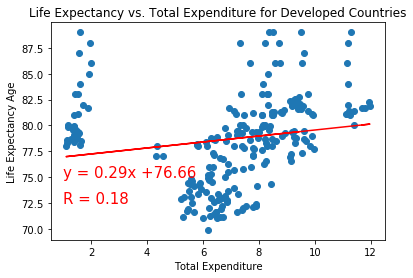

In [7]:
# Total Expenditure vs Life Expectancy for Developed Country
dev_expen = df.loc[df["Status"] == "Developed", ["Life Expectancy", "Total Expenditure", "Percentage Expenditure"]]

# Define x-values and y-values and place into lists
x_values = dev_expen["Total Expenditure"]
y_values = dev_expen["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Total Expenditure for Developed Countries")
plt.xlabel("Total Expenditure")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(1,75),fontsize=15,color="red")
plt.annotate(r_value,(1,72.5),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Total Expenditure is: {round(rvalue,2)}")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and Total Expenditure is: 0.1


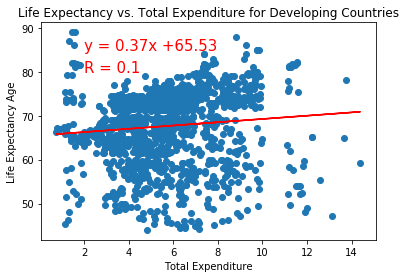

In [8]:
# Total Expenditure vs Life Expectancy for Developing Country
developing_expen = df.loc[df["Status"] == "Developing", ["Life Expectancy", "Total Expenditure", "Percentage Expenditure"]]

# Define x-values and y-values and place into lists
x_values = developing_expen["Total Expenditure"]
y_values = developing_expen["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Total Expenditure for Developing Countries")
plt.xlabel("Total Expenditure")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(2,85),fontsize=15,color="red")
plt.annotate(r_value,(2,80),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Total Expenditure is: {round(rvalue,2)}")

# Show plot
plt.show()


The Correlation (R) between Average Life Expectancy Age and Total Expenditure is: 0.34


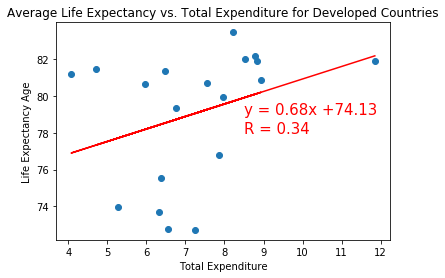

In [9]:
# Total Expenditure vs Life Expectancy for Developed Country
dev_expen = df.loc[df["Status"] == "Developed", ["Country", "Life Expectancy", "Total Expenditure", "Percentage Expenditure"]]

country_groupby = dev_expen.groupby("Country").mean()

# Define x-values and y-values and place into lists
x_values = country_groupby["Total Expenditure"]
y_values = country_groupby["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Average Life Expectancy vs. Total Expenditure for Developed Countries")
plt.xlabel("Total Expenditure")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(8.5,79),fontsize=15,color="red")
plt.annotate(r_value,(8.5,78),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Average Life Expectancy Age and Total Expenditure is: {round(rvalue,2)}")

# Show plot
plt.show()


The Correlation (R) between Average Life Expectancy Age and Total Expenditure is: 0.13


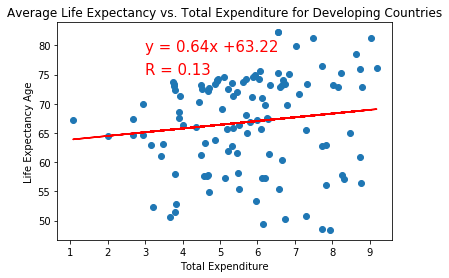

In [10]:
# Total Expenditure vs Life Expectancy for Developing Country
developing_expen = df.loc[df["Status"] == "Developing", ["Country", "Life Expectancy", "Total Expenditure", "Percentage Expenditure"]]

country_groupby = developing_expen.groupby("Country").mean()

# Define x-values and y-values and place into lists
x_values = country_groupby["Total Expenditure"]
y_values = country_groupby["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Average Life Expectancy vs. Total Expenditure for Developing Countries")
plt.xlabel("Total Expenditure")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(3,79),fontsize=15,color="red")
plt.annotate(r_value,(3,75),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Average Life Expectancy Age and Total Expenditure is: {round(rvalue,2)}")

# Show plot
plt.show()


The Correlation (R) between Average Life Expectancy Age and Income Composition of Resources is: 0.74


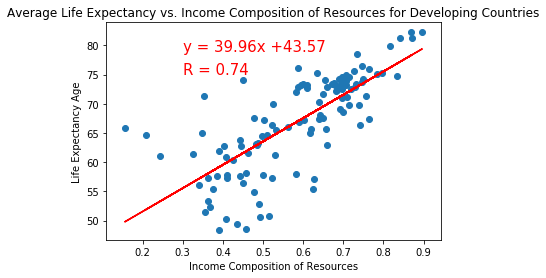

In [11]:
# Income Composition vs Life Expectancy for Developing Country
developing_income = df.loc[df["Status"] == "Developing", ["Country", "Life Expectancy", "Income Composition of Resources"]]

country_groupby = developing_income.groupby("Country").mean()

# Define x-values and y-values and place into lists
x_values = country_groupby["Income Composition of Resources"]
y_values = country_groupby["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Average Life Expectancy vs. Income Composition of Resources for Developing Countries")
plt.xlabel("Income Composition of Resources")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(0.3,79),fontsize=15,color="red")
plt.annotate(r_value,(0.3,75),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Average Life Expectancy Age and Income Composition of Resources is: {round(rvalue,2)}")

# Show plot
plt.show()


The Correlation (R) between Average Life Expectancy Age and Income Composition of Resources is: 0.83


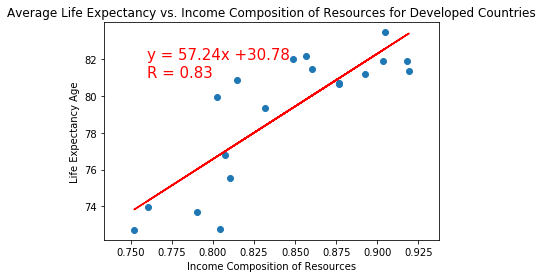

In [12]:
# Income Composition vs Life Expectancy for Developed Country
developed_income = df.loc[df["Status"] == "Developed", ["Country", "Life Expectancy", "Income Composition of Resources"]]

country_groupby = developed_income.groupby("Country").mean()

# Define x-values and y-values and place into lists
x_values = country_groupby["Income Composition of Resources"]
y_values = country_groupby["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Average Life Expectancy vs. Income Composition of Resources for Developed Countries")
plt.xlabel("Income Composition of Resources")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(0.76,82),fontsize=15,color="red")
plt.annotate(r_value,(0.76,81),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Average Life Expectancy Age and Income Composition of Resources is: {round(rvalue,2)}")

# Show plot
plt.show()



The Correlation (R) between Average Life Expectancy Age and Adult Mortality is: -0.86


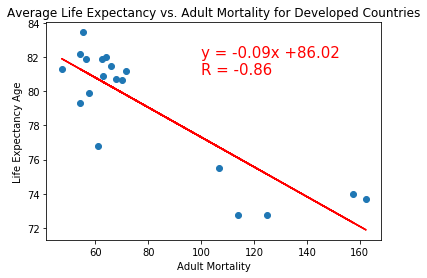

In [18]:
# Adult Morality vs Life Expectancy for Developed Country
developed_mortality = df.loc[df["Status"] == "Developed", ["Country", "Life Expectancy", "Adult Mortality"]]

country_groupby = developed_mortality.groupby("Country").mean()

# Define x-values and y-values and place into lists
x_values = country_groupby["Adult Mortality"]
y_values = country_groupby["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Average Life Expectancy vs. Adult Mortality for Developed Countries")
plt.xlabel("Adult Mortality")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(100,82),fontsize=15,color="red")
plt.annotate(r_value,(100,81),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Average Life Expectancy Age and Adult Mortality is: {round(rvalue,2)}")

# Show plot
plt.show()


The Correlation (R) between Average Life Expectancy Age and Adult Mortality is: -0.85


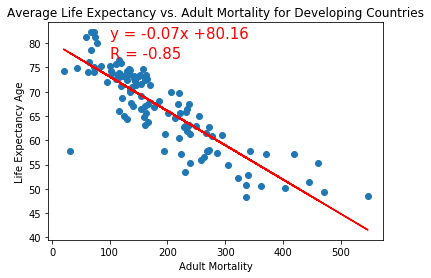

In [17]:
# Adult Morality vs Life Expectancy for Developing Country
developing_mortality = df.loc[df["Status"] == "Developing", ["Country", "Life Expectancy", "Adult Mortality"]]

country_groupby = developing_mortality.groupby("Country").mean()

# Define x-values and y-values and place into lists
x_values = country_groupby["Adult Mortality"]
y_values = country_groupby["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Average Life Expectancy vs. Adult Mortality for Developing Countries")
plt.xlabel("Adult Mortality")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(100,81),fontsize=15,color="red")
plt.annotate(r_value,(100,77),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Average Life Expectancy Age and Adult Mortality is: {round(rvalue,2)}")

# Show plot
plt.show()
